In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

main_dir = 'C:\\Users\\Georgios\\Downloads\\clustering4ccerRevision\\journal\\new\\'
df = pd.read_csv(main_dir + 'schemaBasedEmbeddingsAnalysisCleanFinalTimesNodes.csv', sep='|')
df

,Dataset,Nodes,Attribute Name,Embeddings,Similarity Measure,Duplicates Type,Valid Pairs,Average Characters D1,Average Tokens D1,Coverage D1,...,KRC Recall,KRC F-Measure,KRC Threshold,KRC Run-time,UMC Precision,UMC Recall,UMC F-Measure,UMC Threshold,UMC Run-time,BMC Configuration
0,Restaurants,2595,Name,FastText,Cosine Similarity,Scarce,339387,11,2,0.67,...,0.921,0.804,0.65,35,0.795,0.787,0.791,0.95,13,Right
1,Restaurants,2595,Name,FastText,Euclidean Distance,Scarce,339678,11,2,0.67,...,0.888,0.819,0.30,25,0.802,0.820,0.811,0.40,12,Right
2,Restaurants,2595,Name,FastText,WMD,Scarce,339678,11,2,0.67,...,0.775,0.645,0.95,90,0.305,0.775,0.438,0.95,89,Right
3,Restaurants,2595,Name,Albert,Cosine Similarity,Scarce,268054,11,2,0.67,...,0.775,0.704,0.95,15,0.527,0.775,0.627,0.95,5,Right
4,Restaurants,2595,Name,Albert,Euclidean Distance,Scarce,339678,11,2,0.67,...,0.753,0.779,0.95,17,0.807,0.753,0.779,0.95,4,Right
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,DBLP-Scholar,63869,Title,Albert,Cosine Similarity,One-sided,153738496,56,8,1.00,...,0.695,0.711,0.95,9131,0.687,0.698,0.692,0.95,2550,Right
66,DBLP-Scholar,63869,Title,Albert,Euclidean Distance,One-sided,154364148,56,8,1.00,...,0.654,0.783,0.15,7583,0.953,0.652,0.774,0.15,1411,Right
67,DBLP-Scholar,63869,Title,Albert,WMD,One-sided,154364148,56,8,1.00,...,0.639,0.690,0.95,8513,0.730,0.640,0.682,0.95,1782,Right
68,Movies,50797,Title,FastText,Cosine Similarity,Balanced,378388014,18,3,1.00,...,0.463,0.604,0.60,36860,0.751,0.486,0.590,0.65,11199,Right


In [2]:
runtimes = pd.DataFrame()

for column in df:
    if (0 < column.find('Run-time')):
        runtimes[column] = df[column] / df['Valid Pairs']

runtimes.columns = ['CNC', 'RSR', 'RCA', 'BAH', 'BMC', 'EXC', 'KRC',  'UMC']

In [3]:
runtimes.describe().round(5)

,CNC,RSR,RCA,BAH,BMC,EXC,KRC,UMC
count,70.00000,70.00000,70.00000,70.00000,70.00000,70.00000,70.00000,70.00000
mean,0.00004,0.00009,0.00011,0.00192,0.00003,0.00006,0.00021,0.00040
std,0.00009,0.00017,0.00012,0.00459,0.00005,0.00014,0.00031,0.00111
min,0.00001,0.00001,0.00001,0.00013,0.00001,0.00001,0.00005,0.00001
25%,0.00001,0.00001,0.00002,0.00034,0.00001,0.00001,0.00006,0.00001
50%,0.00001,0.00002,0.00004,0.00081,0.00001,0.00001,0.00007,0.00002
75%,0.00001,0.00007,0.00020,0.00122,0.00002,0.00003,0.00015,0.00006
max,0.00052,0.00110,0.00041,0.03069,0.00025,0.00093,0.00183,0.00718


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font_scale = 1.4)
sns.set_style("white")

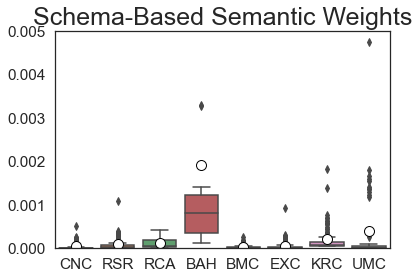

In [5]:
p = sns.boxplot(data = runtimes,
                showmeans=True,
                meanprops={"marker":"o",
                           "markerfacecolor":"white", 
                           "markeredgecolor":"black",
                           "markersize":"10"})
p.set_title("Schema-Based Semantic Weights", fontsize = 25)
plt.ylim(0, 0.005)
plt.savefig(main_dir + 'sbseNormRT.eps', format='eps')

In [6]:
runtimes = pd.DataFrame()

for column in df:
    if (0 < column.find('Run-time')):
        runtimes[column] = df[column] / df['Nodes']

runtimes.columns = ['CNC', 'RSR', 'RCA', 'BAH', 'BMC', 'EXC', 'KRC',  'UMC']

In [7]:
runtimes.describe().round(3)

,CNC,RSR,RCA,BAH,BMC,EXC,KRC,UMC
count,70.000,70.000,70.000,70.000,70.000,70.000,70.000,70.000
mean,0.044,0.095,0.055,0.719,0.047,0.076,0.392,1.129
std,0.160,0.331,0.078,0.997,0.184,0.281,1.668,6.520
min,0.000,0.001,0.002,0.205,0.001,0.001,0.002,0.002
25%,0.003,0.006,0.028,0.228,0.003,0.003,0.016,0.004
50%,0.007,0.014,0.051,0.272,0.010,0.009,0.070,0.015
75%,0.014,0.055,0.058,0.664,0.016,0.023,0.130,0.034
max,1.258,2.651,0.508,5.027,1.494,2.237,13.630,53.532


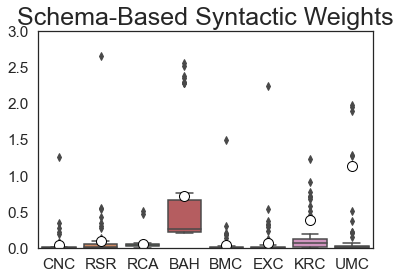

In [11]:
p = sns.boxplot(data = runtimes,
                showmeans=True,
                meanprops={"marker":"o",
                           "markerfacecolor":"white", 
                           "markeredgecolor":"black",
                           "markersize":"10"})
p.set_title("Schema-Based Syntactic Weights", fontsize = 25)
plt.ylim(0, 3)
plt.savefig(main_dir + 'sbseNormRT.eps', format='eps')